In [1]:
import pandas as pd
import numpy as np

#### Import the dataset

In [2]:
data = pd.read_csv("Pokemon.csv")

In [3]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### Prepare the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#### observam ca aproape jumatate de date din coloana type 2 lipsesc
v-om incerca mai multe tipuri de inputari pentru a o gasi pe cea mai optima


In [6]:
names = data.iloc[:, [0,1]]


#### Am creat un subset de date care contine numele fiecarui pokemon si indexul lui, pentru a putea opera cu ei la sfarsit

In [7]:
data = data.drop('Name', axis=1)

#### Inlocuim datele de tip object

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
data["Type 1"]=lbl_enc.fit_transform(data["Type 1"])
data["Type 2"]=lbl_enc.fit_transform(data["Type 2"])
data["Legendary"]=lbl_enc.fit_transform(data["Legendary"])

<AxesSubplot:>

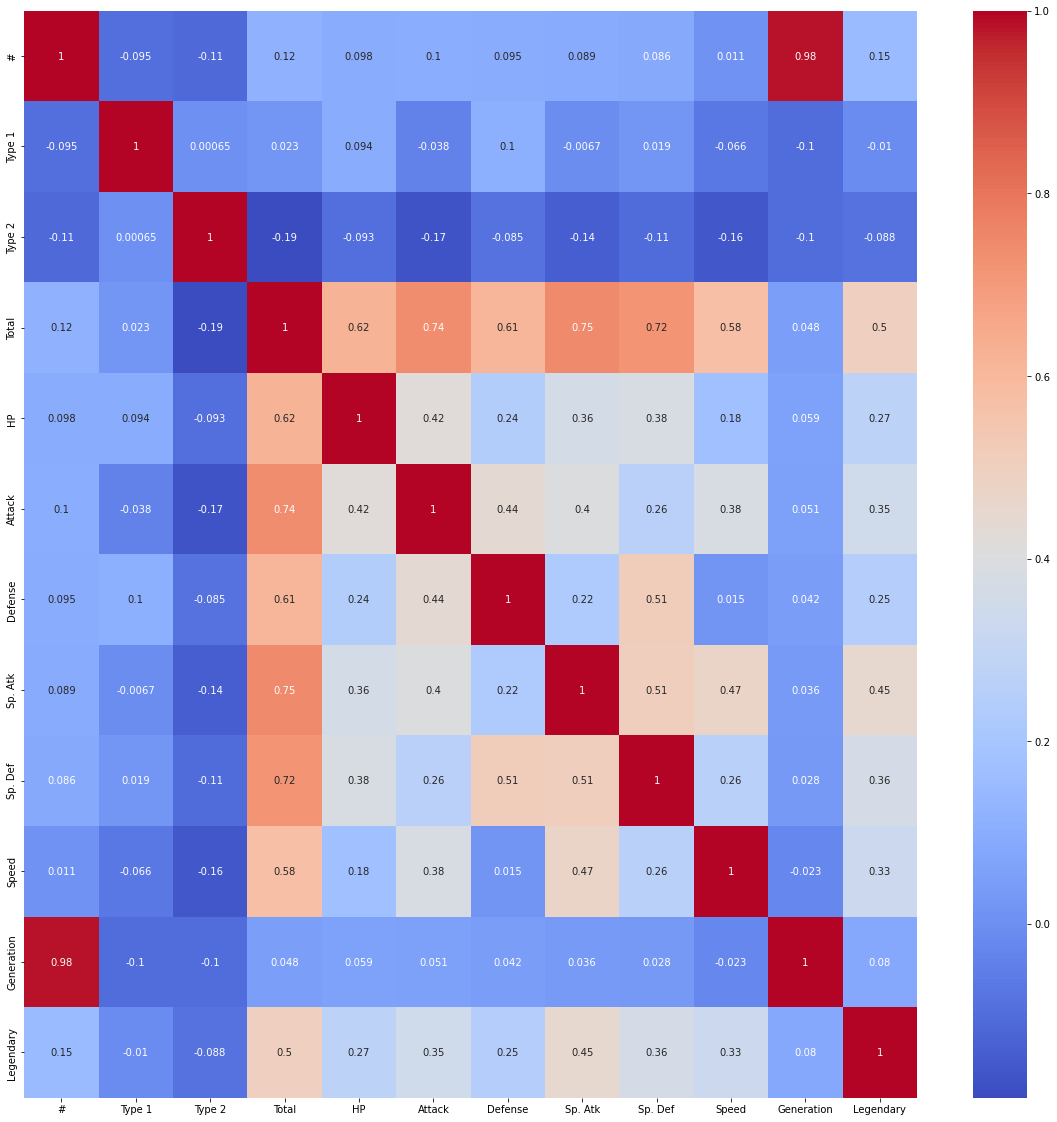

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

#### Observam ca coloanele Type 1 si Type 2 au o corelatie negativa
#### Incercam sa inputam datele lipsa prin KNN inputer

In [10]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=10) 
data_knn = data
data_knn = pd.DataFrame(knn_imp.fit_transform(data_knn),columns = data_knn.columns)

In [11]:
data.isnull().sum()

#             0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

<AxesSubplot:>

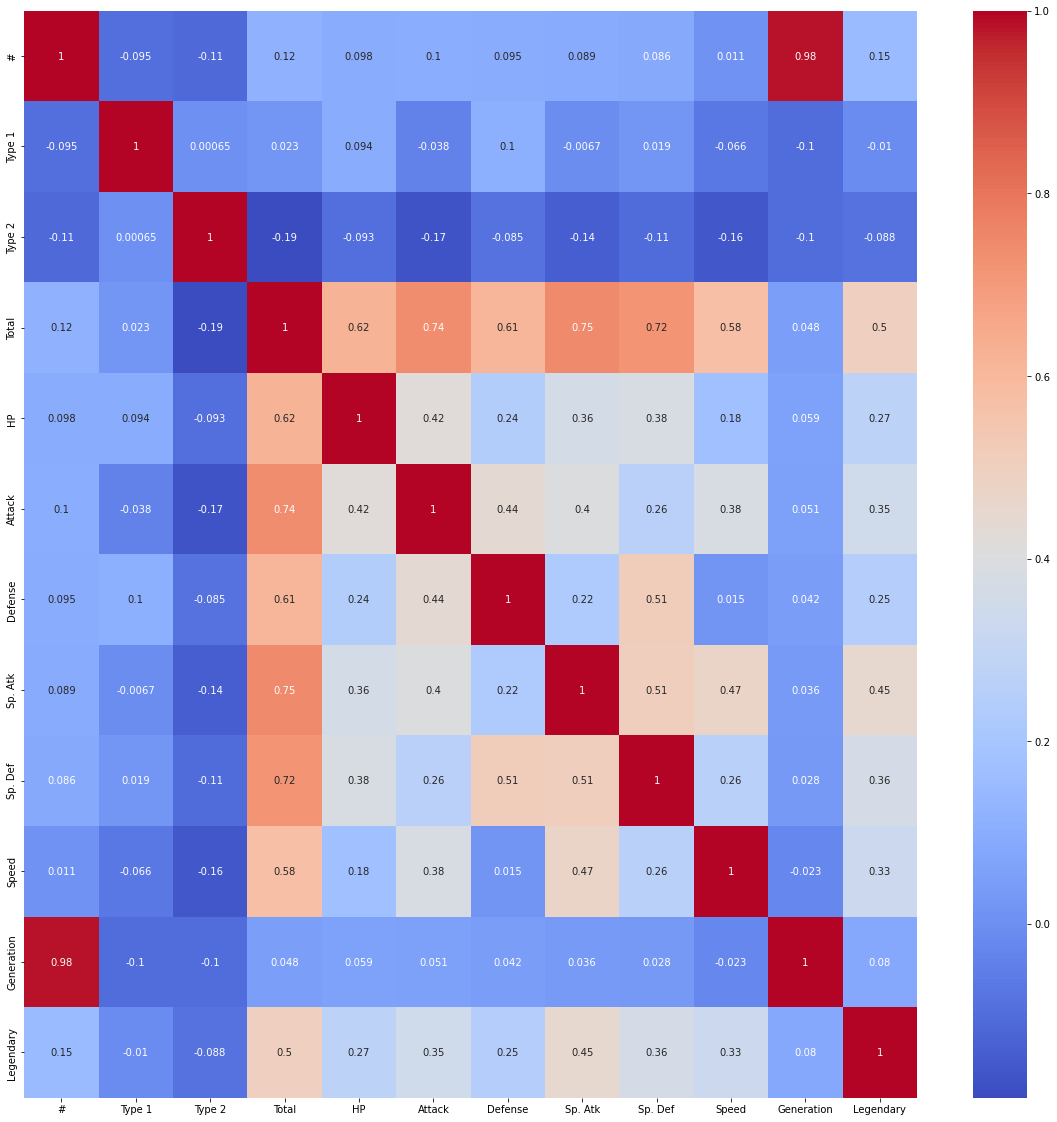

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data_knn.corr(),annot = True,cmap = 'coolwarm')

### corelatia a ramas aceeasi
#### Incercam si prin Iterative inputing

<AxesSubplot:>

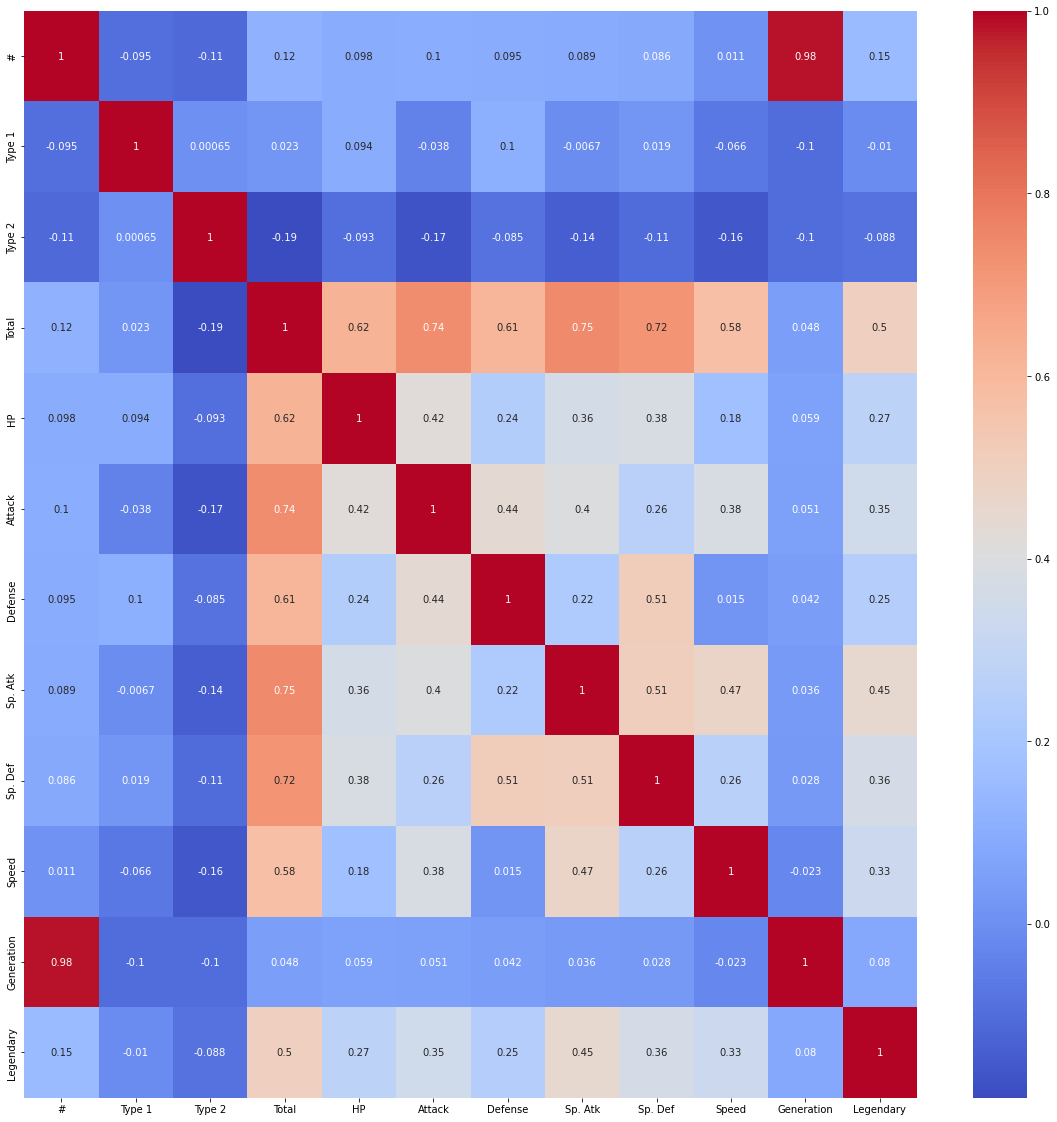

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data_iterativ = data
imp_mean = IterativeImputer(random_state=0)
data_iterativ =pd.DataFrame(imp_mean.fit_transform(data_iterativ),columns = data_iterativ.columns)
plt.figure(figsize=(20,20))
sns.heatmap(data_iterativ.corr(),annot = True,cmap = 'coolwarm')

#### Chiar si dupa implementarea a 2 metode de inputare, corelatia coloanei Type 2 a ramas la fel,plus ca corelatia are valoare negativa, decidem sa facem drop la coloanele type1 si type 2, deoarece nu influenteaza antrenarea

In [14]:
data = data.drop(["Type 1","Type 2"],axis =1)

D:\Users\Valerian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Valerian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Valerian\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

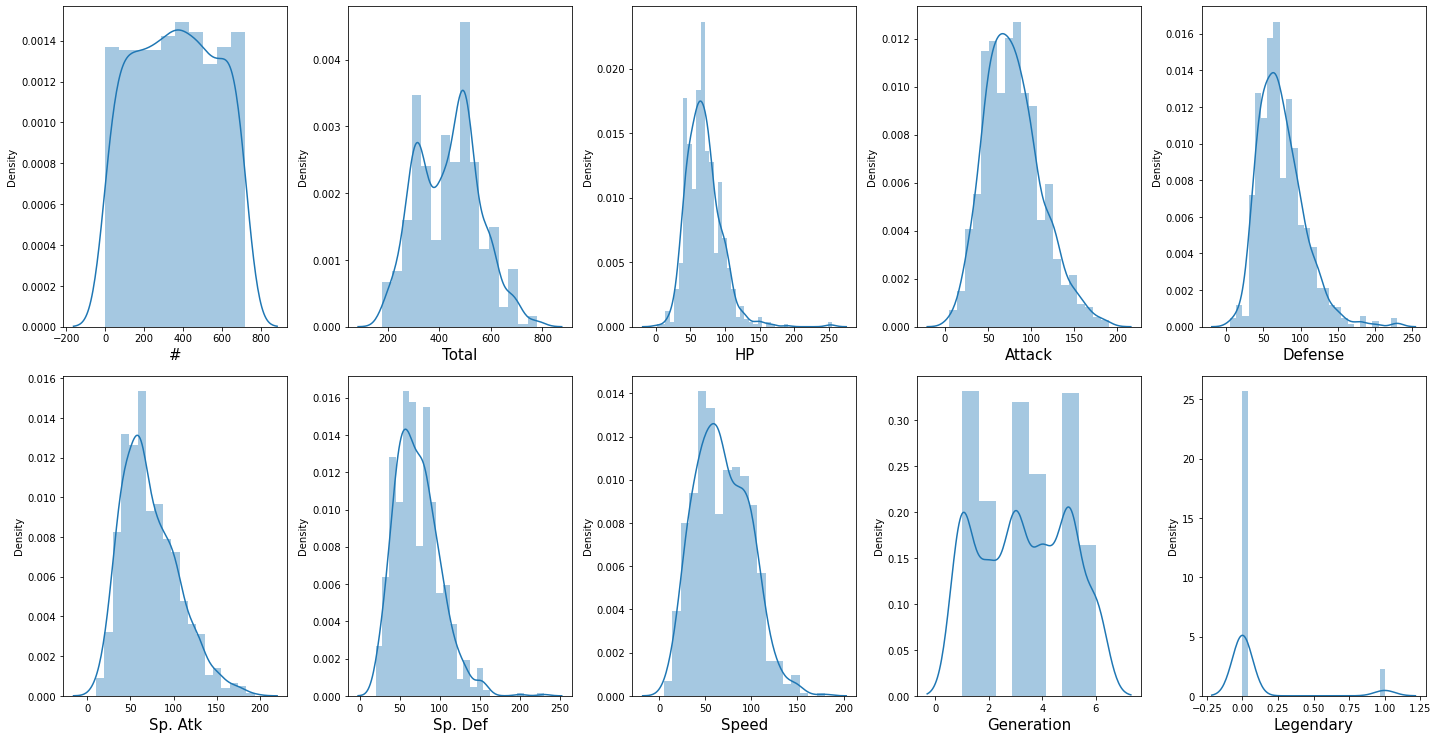

In [15]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 10:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

#### Observam distributia datelor a fiecarei coloane

<AxesSubplot:>

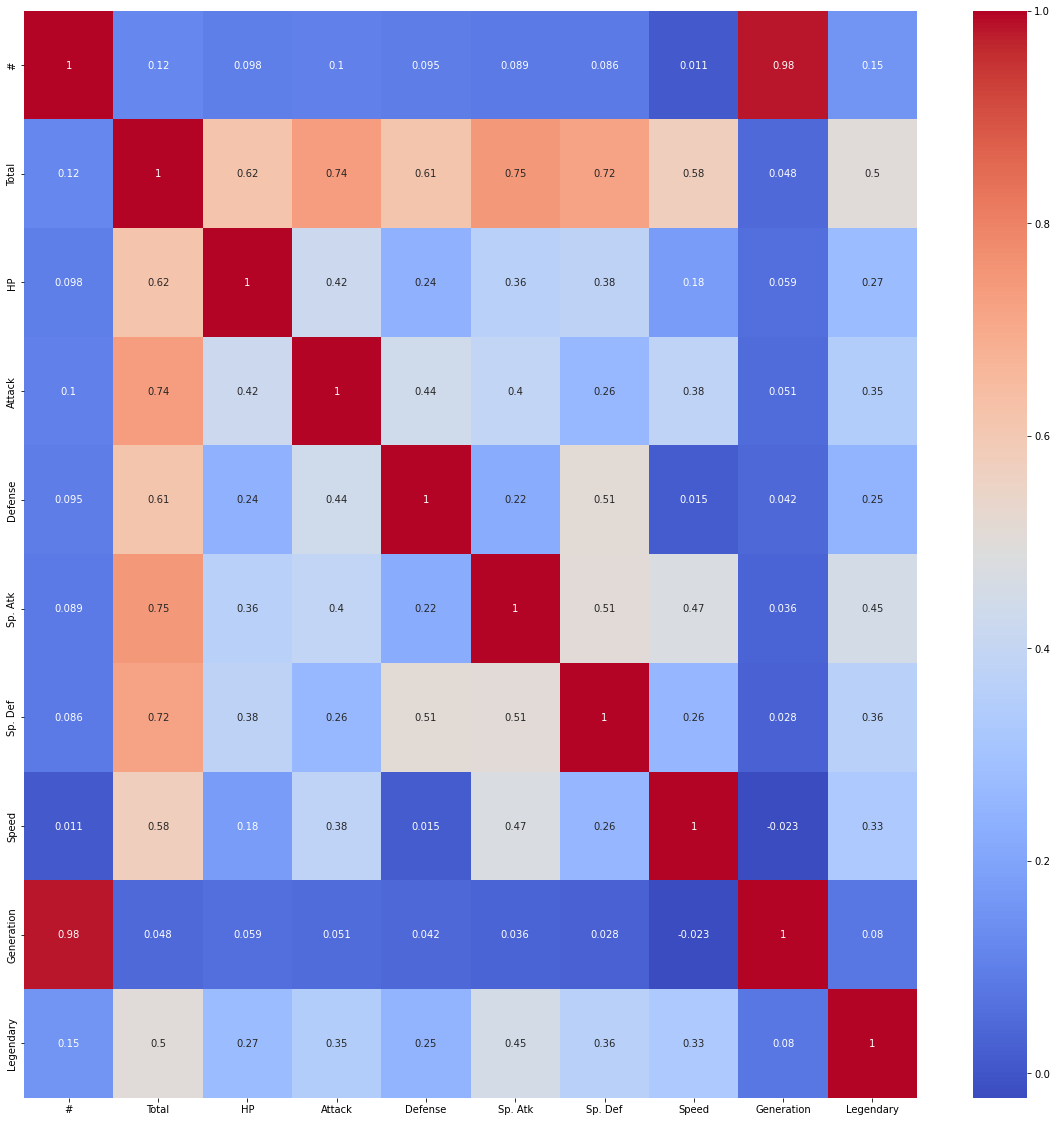

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

[0.306956   0.0991922  0.09218221 0.07581124 0.15389095 0.10376507
 0.0993904  0.06881192]


<AxesSubplot:>

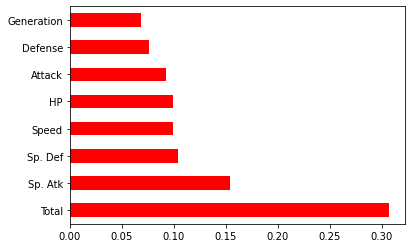

In [17]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import ExtraTreesClassifier
X = data.iloc[:,1:9]  
y = data.iloc[:,-1]  
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feature_cols = pd.Series(model.feature_importances_, index=X.columns)
feature_cols.nlargest(len(data.columns)).plot(kind='barh', color = 'red')

#### Coloanele cu cea mai mare corelatie sunt Speed Atack si Total

In [18]:
bigest_corr = data.loc[:,["Total","Sp. Atk"]]

In [78]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [79]:
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [149]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=34)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rr=clf.predict(X_test)
y_pred_rr

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

#### Numarul de estimatori trebuie sa fie aprox egal cu sqrt din numarul de linii

In [151]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rr))

Accuracy: 0.95


In [153]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_lr = classifier.predict(X_test)
y_pred_lr

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [154]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9375


#### Putem observa ca Random Forest are o acuratete un pic mai mare

In [82]:
clf.predict([[780, 100, 100, 123,100,120,90,1]])

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### Am atribuit valori asemanatoare cu cele a unui pokemon legendar si rezultatul a iesit corespunzator

In [83]:
data.loc[data['Legendary'] == 1]

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,580,90,85,100,95,125,85,1,1
157,145,580,90,90,85,125,90,100,1,1
158,146,580,90,100,90,125,85,90,1,1
162,150,680,106,110,90,154,90,130,1,1
163,150,780,106,190,100,154,100,130,1,1
...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,1
796,719,700,50,160,110,160,110,110,6,1
797,720,600,80,110,60,150,130,70,6,1
798,720,680,80,160,60,170,130,80,6,1


In [86]:
from sklearn.ensemble import IsolationForest
iForest = IsolationForest(n_estimators=20, verbose=2)
iForest.fit(X_train)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=2)

In [158]:
pred = iForest.predict(X_train)
isolation_forest_outliers = np.count_nonzero(pred == -1)
X_train_iforest, y_train_iforest = X_train.iloc[(pred != -1), :], y_train[(pred != -1)]

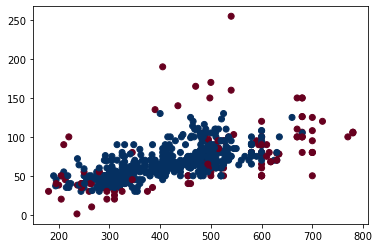

In [115]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=pred, cmap='RdBu')

#### Observam ca datele selectate ca anomalii, sunt in majoritate cele situate mai departe de partea principala

In [117]:
pred_scores = -1*iForest.score_samples(X_train)

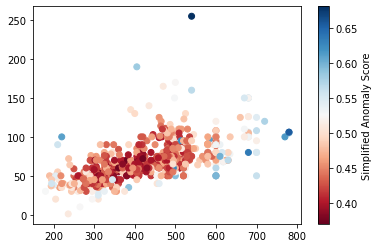

In [118]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=pred_scores, cmap='RdBu')  #folosim xtrain-ul simplu pentru a pastra valorile cu -1
plt.colorbar(label='Simplified Anomaly Score')
plt.show()

In [96]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(X_train)
oneclass_svm=clf.predict(X_train)
oneclass_svm_outliers = np.count_nonzero(oneclass_svm == -1)
X_train_oncsvm, y_train_oncsvm = X_train.iloc[(oneclass_svm != -1), :], y_train[(oneclass_svm != -1)]

In [120]:
ocsvm_score=clf.score_samples(X_train)

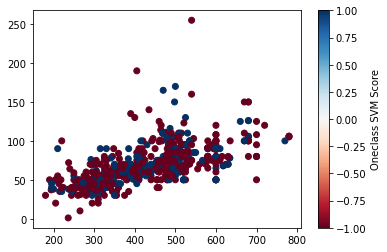

In [217]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=oneclass_svm, cmap='RdBu')
plt.colorbar(label='Oneclass SVM Score')
plt.show()

#### Aceasta metoda a identificat mai multe date drept anomalii

In [99]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(X_train)
cov_pred = cov.predict(X_train)
eliptic_envelope_outliers = np.count_nonzero(cov_pred == -1)
X_train_eenvelope, y_train_eenvelope = X_train.iloc[(cov_pred != -1), :], y_train[(cov_pred != -1)]


D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.482436555173061 > 7.436108098887092). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (5.628408225641530 > 3.798694612866516). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not h

In [123]:
cov_score=-1* cov.score_samples(X_train)

In [124]:

cov_score

array([ 10.29725191,   3.83882431,   6.05841317,   9.60223093,
         8.40389939,  13.04633726,   3.84912977,   3.35613465,
        10.71824426,  12.53349012,  11.93687609,   3.19629955,
         7.91495378,   6.94178488,  16.93086199,   1.07208266,
         2.59868969,   4.12543515,  64.24305008,   2.46947561,
         5.38767418,   6.37583618,  11.70824255,   5.27261082,
        23.28939676,   3.95777176,   8.31199687,   3.62589939,
         7.13264405,   8.26592516,  11.62985785,  24.63824381,
         3.75205504,   6.18287262,   2.05218492,  17.86481896,
         9.45148542,   1.88881214,   6.36947836,   8.78818383,
        15.33809992,  20.29701921,  26.00628051,  15.42230395,
         9.42467104,   3.94378652,   7.75585581,  72.93211346,
         4.07438035,  12.53464227,   4.06988386,  25.55950026,
        11.93531432,  12.80816049,   9.17837037,   3.57864505,
         3.72420697,   1.13816443,   5.67971121,  11.09031807,
        62.62285781,   6.03924062,  14.52887109,   5.07

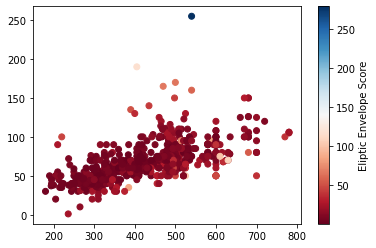

In [219]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=cov_score, cmap='RdBu')
plt.colorbar(label='Eliptic Envelope Score')
plt.show()

In [127]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30)
lof_pred=clf.fit_predict(X_train)
lof_outliers = np.count_nonzero(lof_pred == -1)
clf_score=clf.negative_outlier_factor_
X_train_lof, y_train_lof = X_train.iloc[(lof_pred != -1), :], y_train[(lof_pred != -1)]

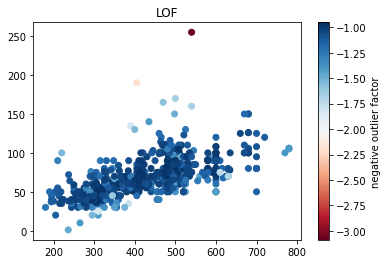

In [128]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=clf_score, cmap='RdBu')
plt.colorbar(label='negative outlier factor')
plt.title("LOF")
plt.show()

In [129]:
scores = [pred_scores,ocsvm_score,cov_score,clf_score]
labels_array= ['Simplified Anomaly Score','Oneclass SVM Score','Eliptic Envelope Score','negative outlier factor']
titles_arr = ['Isolation forest','OneClass SVM','Eliptic Envelope','Local outlier factor']
isolation_prediction=[pred,oneclass_svm,cov_pred,lof_pred]
outliers_array=[isolation_forest_outliers,oneclass_svm_outliers,eliptic_envelope_outliers,lof_outliers]
algorithm_array=['isolation forest','oneclass svm','eliptical envelope','lof']

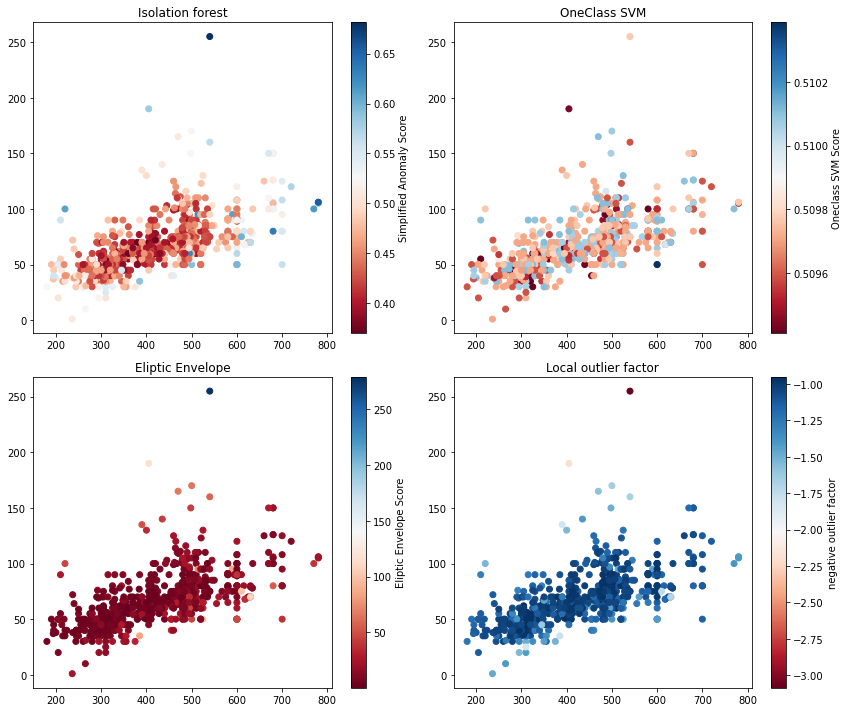

In [131]:
plotnumber = 0
plt.figure(figsize = (12, 10))
for i in range(1,5):
        ax = plt.subplot(2,2,i)
        plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=scores[plotnumber], cmap='RdBu')
        plt.colorbar(label=labels_array[plotnumber])
        plt.title(titles_arr[plotnumber]) 
        plotnumber += 1
    
plt.tight_layout()
plt.show()

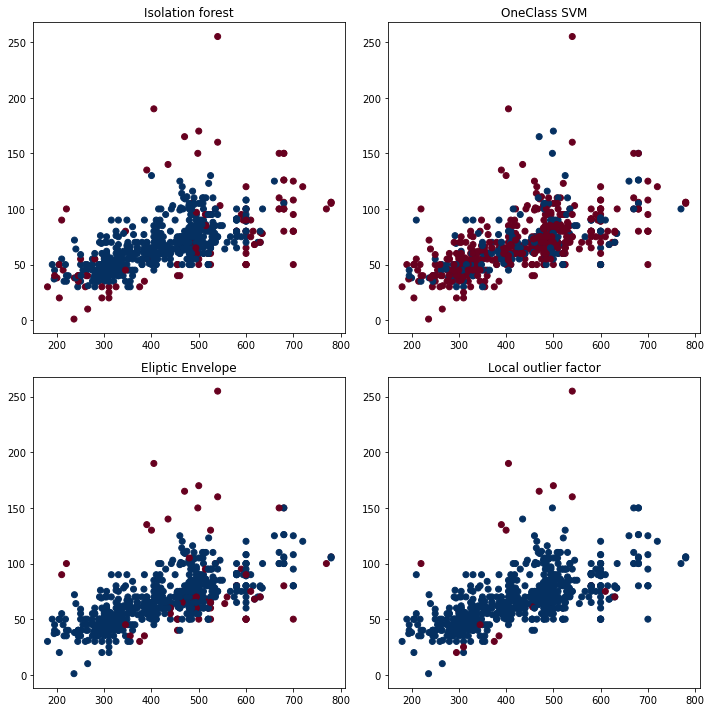

In [132]:
plotnumber = 0
plt.figure(figsize = (10, 10))
for i in range(1,5):
        ax = plt.subplot(2,2,i)
        plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=isolation_prediction[plotnumber], cmap='RdBu')
        plt.title(titles_arr[plotnumber])
        plotnumber += 1
    
plt.tight_layout()
plt.show()

#### Cea mai mare rata de contaminare o are Oneclass Svm, iar LOF are cele mai putine anomalii identificate

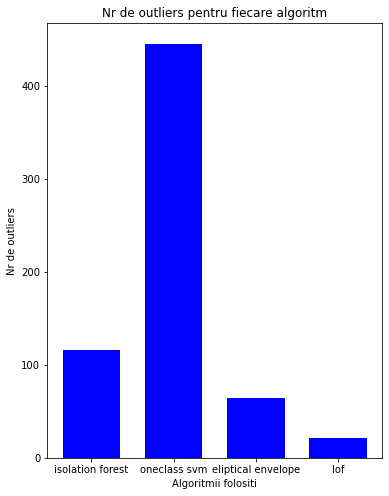

In [133]:
fig = plt.figure(figsize = (6, 8))

plt.bar(algorithm_array, outliers_array, color ='blue',
        width = 0.7)
 
plt.xlabel("Algoritmii folositi")
plt.ylabel("Nr de outliers")
plt.title("Nr de outliers pentru fiecare algoritm")
plt.show()

#### Putem observa ca oneclass SVM a identificat anomalii cu un decalaj mare fata de celelalte metode

In [134]:
iforest_contamination = [] 
for i in range(1,6) :
    iForest = IsolationForest(n_estimators=10, verbose=2,contamination =float(i/10))
    iForest.fit(X_train)
    pred = iForest.predict(X_train)
    iforest_contamination.append(np.count_nonzero(pred == -1))

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [135]:
iforest_contamination

[64, 128, 192, 256, 320]

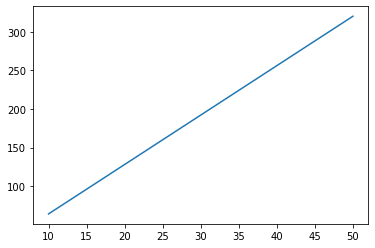

In [136]:
x_val = [10,20,30,40,50]
plt.plot(x_val,iforest_contamination)

In [137]:
oneclass_svm_contamination = [] 
for i in range(1,6) :
    clf = OneClassSVM(gamma='auto',contamination = i/10).fit(X_train)
oneclass_svm=clf.predict(X)
oneclass_svm_contamination.append(np.count_nonzero(oneclass_svm == -1))

TypeError: __init__() got an unexpected keyword argument 'contamination'

In [138]:
elipt_envelope_contamination = [] 
for i in range(1,6) :
    cov = EllipticEnvelope(random_state=0,contamination = i/10).fit(X_train)
    cov_pred = cov.predict(X)
    elipt_envelope_contamination.append(np.count_nonzero(cov_pred == -1))
elipt_envelope_contamination
    

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.482436555173061 > 7.436108098887092). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (5.628408225641530 > 3.798694612866516). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not h

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.062899331758954 > 6.546420770657491). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (8.266559645072528 > 5.315418838766336). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.978132057419558 > 5.800907407587339). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\V

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.078345417013526 > 4.913520316498610). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.579074189715475 > 5.049030327020058). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.118064955055472 > 6.436171472239801). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\V

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.903643770976208 > 4.740587977352288). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (7.126794836112012 > 5.046732937555086). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (6.827312998420685 > 6.351381924605107). You may want to try with a higher value of support_fraction (current value: 0.509).
  warnings.warn(
D:\Users\V

[82, 157, 236, 326, 407]

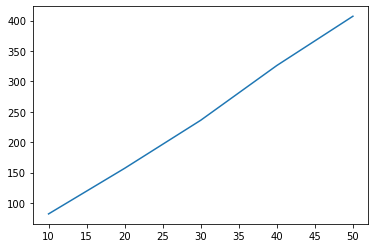

In [139]:
plt.plot(x_val,elipt_envelope_contamination)

In [140]:
lof_contamination = []
for i in range (1,6):
    clf = LocalOutlierFactor(n_neighbors=30,contamination = i/10)
    lof_pred=clf.fit_predict(X_train)
    lof_contamination.append(np.count_nonzero(lof_pred == -1))

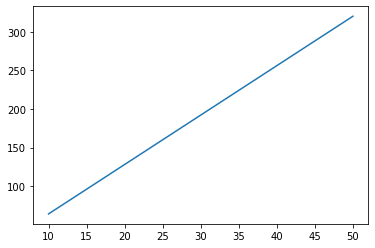

In [141]:
plt.plot(x_val,lof_contamination)

### In urma efectuarii lineploturilor, putem observa faptul ca este mai bine ca rata de contaminare sa fie automata,deoare in cazul in care o satam noi, ea reprezinta o valoare fixa,ceea ce poate face ca sa inlaturam date importante, sau invers, ca sa nu inlaturam date de ajuns, mai bine lasam la 'auto'

## acuratetea fiecaruia

In [167]:
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train_iforest, y_train_iforest)
y_pred_lr = classifier1.predict(X_test)
y_pred_lr

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [168]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.93125


In [161]:
classifier.fit(X_train_oncsvm, y_train_oncsvm)
y_pred_oncsvm = classifier.predict(X_test)
y_pred_oncsvm

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [162]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oncsvm))

Accuracy: 0.9125


In [170]:
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train_eenvelope, y_train_eenvelope)
y_pred_eenvelope = classifier2.predict(X_test)
y_pred_eenvelope

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [171]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_eenvelope))

Accuracy: 0.9375


In [172]:
classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train_lof, y_train_lof)
y_pred_lof = classifier4.predict(X_test)
y_pred_lof

D:\Users\Valerian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [173]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lof))

Accuracy: 0.9375


### Random forest

In [199]:
clf1=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train_iforest,y_train_iforest)

y_pred_rr_if=clf1.predict(X_test)
y_pred_rr_if

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [200]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rr_if))

Accuracy: 0.91875


In [197]:
clf2=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train_oncsvm,y_train_oncsvm)

y_pred_rr_oncsvm=clf2.predict(X_test)
y_pred_rr_oncsvm

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [198]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rr_oncsvm))

Accuracy: 0.925


In [195]:
clf3=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(X_train_eenvelope,y_train_eenvelope)

y_pred_rr_eenvelope=clf3.predict(X_test)
y_pred_rr_eenvelope

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [196]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rr_eenvelope))

Accuracy: 0.95


In [201]:
clf4=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf4.fit(X_train_lof,y_train_lof)

y_pred_rr_lof=clf4.predict(X_test)
y_pred_rr_lof

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [203]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rr_lof))

Accuracy: 0.96875


In [216]:
d = {
     'Estimator': ['LR', 'LR', 'LR','LR','RR', 'RR', 'RR','RR','RR','LR'],
     'Outlie detection algorithm': ['iforest', 'oneclass SVM', 'eEnvelope','LOF','iforest', 'oneclass SVM', 'eEnvelope','LOF','-','-'],
     'Accuracy': [metrics.accuracy_score(y_test, y_pred_lr),metrics.accuracy_score(y_test, y_pred_oncsvm),metrics.accuracy_score(y_test, y_pred_eenvelope),metrics.accuracy_score(y_test, y_pred_lof),metrics.accuracy_score(y_test, y_pred_rr_if),metrics.accuracy_score(y_test, y_pred_rr_oncsvm),metrics.accuracy_score(y_test, y_pred_rr_eenvelope), metrics.accuracy_score(y_test, y_pred_rr_lof),metrics.accuracy_score(y_test, y_pred_rr),metrics.accuracy_score(y_test, y_pred_lr)],
}
df = pd.DataFrame(data=d)
df

,Estimator,Outlie detection algorithm,Accuracy
0,LR,iforest,0.93125
1,LR,oneclass SVM,0.91250
2,LR,eEnvelope,0.93750
3,LR,LOF,0.93750
4,RR,iforest,0.91875
5,RR,oneclass SVM,0.92500
6,RR,eEnvelope,0.95000
7,RR,LOF,0.96875
8,RR,-,0.95000
9,LR,-,0.93125


### In concluzie, putem observa,ca chiar daca datele outliers sunt diferite de majoritatea celorlalte date, dar au si ele un rol in rezultatul prezicerii, din acest tabel, putem observa ca cele 2 algoritme:Eliptic Envelope si LOF, au avut cel mai mic numar de outliers,dar au acuratetia cea mai mare.